## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


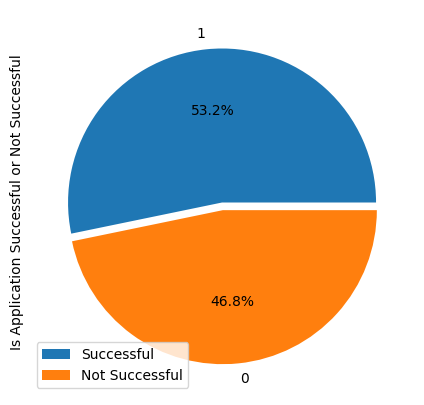

In [10]:
# Helper function for data distribution
# Visualize the proportion of successful canidates
def success_rate(data):
  count = ""
  if isinstance(data, pd.DataFrame):
      count = data["IS_SUCCESSFUL"].value_counts()
  else:
      count = data.value_counts()


  count.plot(kind = 'pie', explode = [0, 0.05],

              figsize = (5, 5), autopct = '%1.1f%%')
  plt.ylabel("Is Application Successful or Not Successful")
  plt.legend(["Successful", "Not Successful"])
  # plt.savefig('opt_success_pie.png')
  plt.show()



# Visualize the proportion of borrowers
success_rate(application_df)

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN"])

In [ ]:
# Review dtypes
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [ ]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_value_counts = application_df['APPLICATION_TYPE'].value_counts()
app_value_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = app_value_counts[app_value_counts < 250].index.tolist()
# print(application_types_to_replace)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_value_counts = application_df['CLASSIFICATION'].value_counts()
class_value_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_value_counts[class_value_counts > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = class_value_counts[class_value_counts < 100].index.tolist()
# print(classifications_to_replace)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64

In [ ]:
application_df['INCOME_AMT'].unique()

array(['0', '1-9999', '10000-24999', '100000-499999', '10M-50M',
       '25000-99999', '50M+', '1M-5M', '5M-10M'], dtype=object)

In [ ]:
# Create Def to combine unique values in INCOME_AMT.
def categorize_income(amount):
    if amount == '0':
        return '0'
    elif amount == '1-9999':
        return '1-9999'
    elif amount == '10000-24999':
        return '10000-24999'
    elif amount == '25000-99999':
        return '25000-99999'
    elif amount == '100000-499999':
        return '100000-499999'
    elif amount == '5M-10M' or amount == '1M-5M':
        return '1M-10M'
    else:
        return '10M+'

# Apply def to dataframe
application_df['INCOME_AMT'] = application_df['INCOME_AMT'].apply(categorize_income)
application_df['INCOME_AMT'].value_counts()

INCOME_AMT
0                24388
25000-99999       3747
100000-499999     3374
1M-10M            1140
1-9999             728
10000-24999        543
10M+               379
Name: count, dtype: int64

In [ ]:
# Reviewing value counts for NAME.
name_value_counts = application_df['NAME'].value_counts()
name_value_counts[name_value_counts>100]

NAME
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCI

In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
names_to_replace = name_value_counts[name_value_counts < 100].index.tolist()
# print(classifications_to_replace)

# Replace in dataframe
for each_name in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(each_name,"Other")

# Check to make sure replacement was successful
application_df['NAME'].value_counts()

NAME
Other                                                                 25987
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CL

In [ ]:
# application_df['ASK_AMT'].value_counts()
# application_df['ASK_AMT'].value_counts().sort_values(ascending=False).head(25)

In [ ]:
# # Create Def to combine unique values in INCOME_AMT.
# def categorize_ask_amt(amount):
#     if amount < 5000:
#         return '0-4999'
#     elif amount < 10000:
#         return '5000-9999'
#     elif amount < 25000:
#         return '10000-24999'
#     elif amount < 100000:
#         return '25000-99999'
#     elif amount < 500000:
#         return '100000-499999'
#     elif amount < 1000000:
#         return '500000-999999'
#     elif amount < 10000000:
#         return '1M-10M'
#     else:
#         return '10M+'

# # Apply def to dataframe
# application_df['ASK_AMT'] = application_df['ASK_AMT'].apply(categorize_ask_amt)
# application_df['ASK_AMT'].value_counts()

In [ ]:
# Review df
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,Other,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,Other,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,Other,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,Other,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,Other,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_df,dtype=float)
application_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M+,INCOME_AMT_1M-10M,INCOME_AMT_25000-99999,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Split our preprocessed data into our features and target arrays
y = application_dummies['IS_SUCCESSFUL'].values
X = application_dummies.drop(columns='IS_SUCCESSFUL', axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Preview X_train_scaled[0]
len(X_train_scaled[0])

78

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])
num_nodes_1 = 80
num_nodes_2 = 30
num_nodes_4 = 1

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=num_nodes_1, activation="relu", input_dim=num_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=num_nodes_2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=num_nodes_4, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 80)                6320      
                                                                 
 dense_14 (Dense)            (None, 30)                2430      
                                                                 
 dense_15 (Dense)            (None, 1)                 31        
                                                                 
Total params: 8781 (34.30 KB)
Trainable params: 8781 (34.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=20)

Epoch 1/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5155 - accuracy: 0.7413
Epoch 2/20
804/804 [==============================] - 2s 2ms/step - loss: 0.4940 - accuracy: 0.7553
Epoch 3/20
804/804 [==============================] - 2s 2ms/step - loss: 0.4909 - accuracy: 0.7565
Epoch 4/20
804/804 [==============================] - 2s 2ms/step - loss: 0.4892 - accuracy: 0.7575
Epoch 5/20
804/804 [==============================] - 3s 3ms/step - loss: 0.4866 - accuracy: 0.7580
Epoch 6/20
804/804 [==============================] - 2s 2ms/step - loss: 0.4853 - accuracy: 0.7594
Epoch 7/20
804/804 [==============================] - 2s 2ms/step - loss: 0.4852 - accuracy: 0.7591
Epoch 8/20
804/804 [==============================] - 2s 2ms/step - loss: 0.4838 - accuracy: 0.7614
Epoch 9/20
804/804 [==============================] - 2s 2ms/step - loss: 0.4831 - accuracy: 0.7614
Epoch 10/20
804/804 [==============================] - 1s 2ms/step - loss: 0.4827 - accuracy: 0.7615

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4912 - accuracy: 0.7572 - 453ms/epoch - 2ms/step
Loss: 0.4911705553531647, Accuracy: 0.7572011947631836


In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")